In [14]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join  


## 데이터 정의

In [15]:
df =  pd.read_csv('이상치제거.csv', header=0, encoding='cp949')

df.columns

Index(['Unnamed: 0', '시점', '시군산지', '일자', '품종', '도매가격.원.kg.', '거래량.톤.',
       '거래금액.백만원.', '마늘.면적..ha.', 'X10a당.생산량..kg.', '생산량..톤.', 'X10a당.생산량.톤',
       '평균', '평균기온..C.', '일강수량.mm.', '평균.풍속.m.s.', '합계.일조시간.hr.',
       '평균.지면온도..C.', '평균.5cm.지중온도..C.'],
      dtype='object')

Text(0, 0.5, 'price')

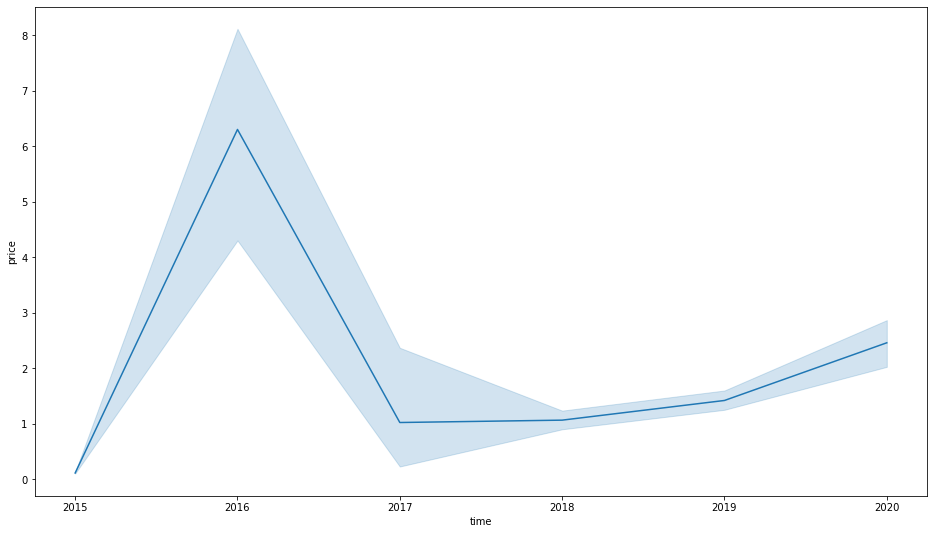

In [16]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=df['거래금액.백만원.'], x=df['시점'])
plt.xlabel('time')
plt.ylabel('price')

# 데이터정규화

In [17]:
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()

scale_cols = ['시점', '도매가격.원.kg.', '거래량.톤.',
       '거래금액.백만원.', '마늘.면적..ha.', 'X10a당.생산량..kg.', '생산량..톤.', 'X10a당.생산량.톤',
       '평균', '평균기온..C.', '일강수량.mm.', '평균.풍속.m.s.', '합계.일조시간.hr.',
       '평균.지면온도..C.', '평균.5cm.지중온도..C.']

df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)

df_scaled.columns = scale_cols

df_scaled

,시점,도매가격.원.kg.,거래량.톤.,거래금액.백만원.,마늘.면적..ha.,X10a당.생산량..kg.,생산량..톤.,X10a당.생산량.톤,평균,평균기온..C.,일강수량.mm.,평균.풍속.m.s.,합계.일조시간.hr.,평균.지면온도..C.,평균.5cm.지중온도..C.
0,0.0,0.513694,0.001731,0.004599,1.000000,0.077966,0.911133,0.077966,0.001133,0.965995,0.219921,0.348630,0.916239,0.891494,0.956213
1,0.0,0.611765,0.001731,0.004599,1.000000,0.077966,0.911133,0.077966,0.001133,0.964970,0.219921,0.336986,0.919658,0.889744,0.954271
2,0.0,0.905882,0.000769,0.004169,1.000000,0.077966,0.911133,0.077966,0.000000,0.942794,0.245262,0.223973,0.895916,0.886164,0.952019
3,0.0,0.258824,0.003655,0.005458,1.000000,0.077966,0.911133,0.077966,0.003399,0.749476,0.255881,0.116438,0.361443,0.669017,0.741266
4,0.2,0.200000,0.003655,0.004169,0.000000,0.179661,0.000000,0.179661,0.003399,0.985611,0.592953,0.052055,0.802849,0.951440,0.979066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,1.0,0.482353,0.000385,0.001160,0.440945,1.000000,1.000000,1.000000,0.007360,0.828964,0.641978,0.197945,0.326686,0.819677,0.834419
1348,1.0,0.463529,0.000769,0.002880,0.440945,1.000000,1.000000,1.000000,0.007360,0.939444,0.604003,0.186986,0.420133,0.935209,0.942932
1349,1.0,0.425882,0.000769,0.002880,0.440945,1.000000,1.000000,1.000000,0.007360,0.918822,0.613347,0.197945,0.419373,0.915882,0.925116
1350,1.0,0.458353,0.002693,0.007178,0.440945,1.000000,1.000000,1.000000,0.007360,0.814255,0.495434,0.579452,0.715480,0.803661,0.800317


In [18]:
TEST_SIZE = 200  # test 200
WINDOW_SIZE = 100 

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [19]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [21]:
from sklearn.model_selection import train_test_split
# 영향을 주는 변수와 받는 변수 설정
feature_cols = ['시점','거래량.톤.',
       '거래금액.백만원.', '마늘.면적..ha.', 'X10a당.생산량..kg.', '생산량..톤.', 'X10a당.생산량.톤',
       '평균', '평균기온..C.', '일강수량.mm.', '평균.풍속.m.s.', '합계.일조시간.hr.',
       '평균.지면온도..C.', '평균.5cm.지중온도..C.']
label_cols = ['도매가격.원.kg.']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((905, 20, 14), (227, 20, 14))

In [22]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((200, 14), (200, 1))

In [23]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 14), (180, 1))

# 모델생성

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [25]:
import os
# mean_squared_error
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
57/57 [==============================] - 3s 12ms/step - loss: 0.0451 - val_loss: 0.0346

Epoch 00001: val_loss improved from inf to 0.03460, saving model to model\tmp_checkpoint.h5
Epoch 2/200
57/57 [==============================] - 0s 9ms/step - loss: 0.0287 - val_loss: 0.0320

Epoch 00002: val_loss improved from 0.03460 to 0.03198, saving model to model\tmp_checkpoint.h5
Epoch 3/200
57/57 [==============================] - 0s 8ms/step - loss: 0.0261 - val_loss: 0.0326

Epoch 00003: val_loss did not improve from 0.03198
Epoch 4/200
57/57 [==============================] - 0s 8ms/step - loss: 0.0254 - val_loss: 0.0302

Epoch 00004: val_loss improved from 0.03198 to 0.03021, saving model to model\tmp_checkpoint.h5
Epoch 5/200
57/57 [==============================] - 0s 8ms/step - loss: 0.0254 - val_loss: 0.0290

Epoch 00005: val_loss improved from 0.03021 to 0.02900, saving model to model\tmp_checkpoint.h5
Epoch 6/200
57/57 [==============================] - 0s 8ms/step - l

In [26]:
## pred_shape
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(180, 1)

## 시계열 그래프

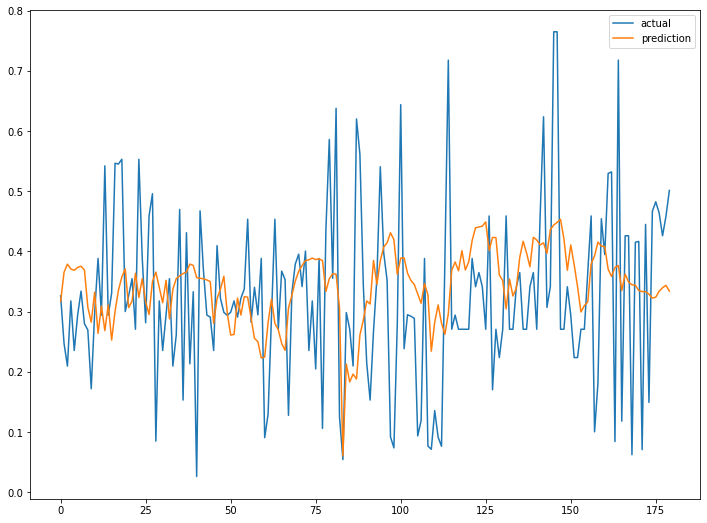

In [27]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()
